### Salary  Prediction of Employees

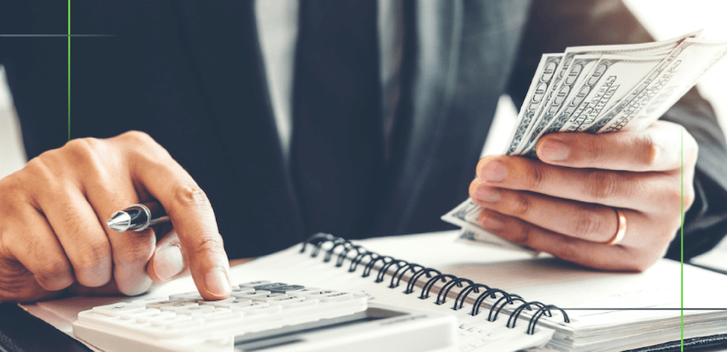

#### Importing  all  the  neccesary libararies

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Importing  the dataset

In [2]:
sal = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

#### About  the  columns in the  dataset

Rank: This  column  tells  about the  rank  earned by  the person basis on diffrent other factors
    
disipline:- it  shows   us the  measure  of  work they  have  achived  in evrything   they  have  done

Years_since_phd: This column tells  us  that  how many years completed after the person had done Phd. degree
    
Years_service: This column tells us  about  that how many years  of  experince  he/she has in a  company
    
Sex: This  column given  the  sex-ratio of male vs female .

Salary: this is  our  Output or label column for prediction

##### Checking  for all the  Null values 

In [4]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

so we can see that there  is  no Null values  present in this  Dataset

#### Performing the EDA

In [5]:
sal['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

so we  have 358 males and  only 39 females  here 

<AxesSubplot:xlabel='sex', ylabel='count'>

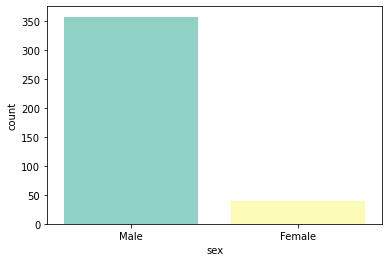

In [6]:
sns.countplot(sal['sex'], palette='Set3', saturation=0.9, dodge=True)

More  of Males  and less  of females 

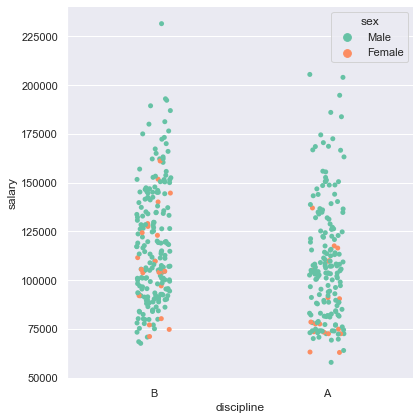

In [7]:
sns.set_theme(style="darkgrid")
sns.catplot(x="discipline", y="salary", hue="sex", data=sal,  height=6, aspect=1, palette='Set2',legend_out=False)

Observations:

    1. As we  can see  that according to discipline also we  have more  males salary and less female salary
    2. As we can see  according  to  the discipline  we have more of males  in both  the  discipline A & B
    3. The B  category  discipline has the Max amount  of salary than  A

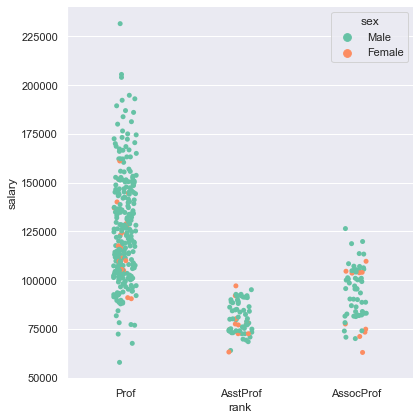

In [8]:
sns.set_theme(style="darkgrid")
sns.catplot(x="rank", y="salary", hue="sex", data=sal,  height=6, aspect=1, palette='Set2',legend_out=False)

##### observations:
    
    1.Here  we  can easily  identify  that in each of  the 3 ranks  we  have more number of males than that of 
         females
        
    2. Here we  can say  that
        Prof-rank: has  the  highest salary counts with ranks count
        Asstprof_rank: has  the lowest salary counts with  ranks counts  too
        Assocprof_rank: has the medium salary counts with ranks  counts too.

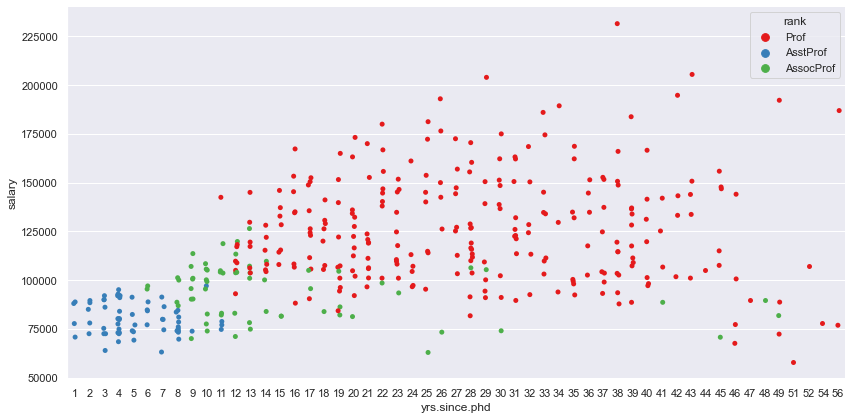

In [9]:
sns.set_theme(style="darkgrid")
sns.catplot(x="yrs.since.phd", y="salary", hue="rank", data=sal,  height=6, aspect=2, palette='Set1',legend_out=False)

##### Observations:

     1 . As it  can be seen  that  the according  to increase  in  the years  of phd  completed  the  salary is 
           moving  up  simultaneously
            
     2.  As it  can be seen  that the rank prof  is more  in case  of completition of degree Phd.

#### Finding  the Correlation

In [10]:
sal.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [11]:
sal.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

#### Corelation heatmap

<AxesSubplot:>

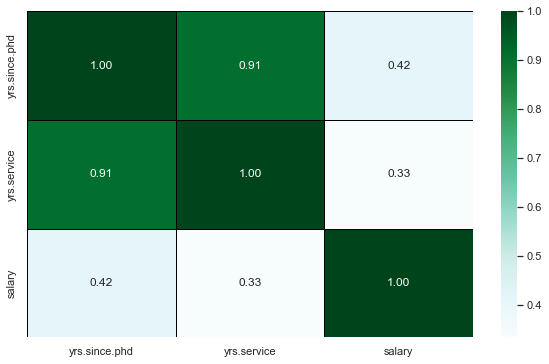

In [12]:
import matplotlib.pyplot  as plt
# making  the  canvas  size
plt.figure(figsize=(10,6))
sns.heatmap(sal.corr(),annot =True, linewidths=0.5, linecolor='black', fmt='.2f',cmap='BuGn')

Observations:

    1. yrs.since.phd  is 42% correlated to salary  which is a   good score
    2. yrs.service  is 33% correlated  to salary  whcih is also a   good score

#### Describing the  Data

In [13]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


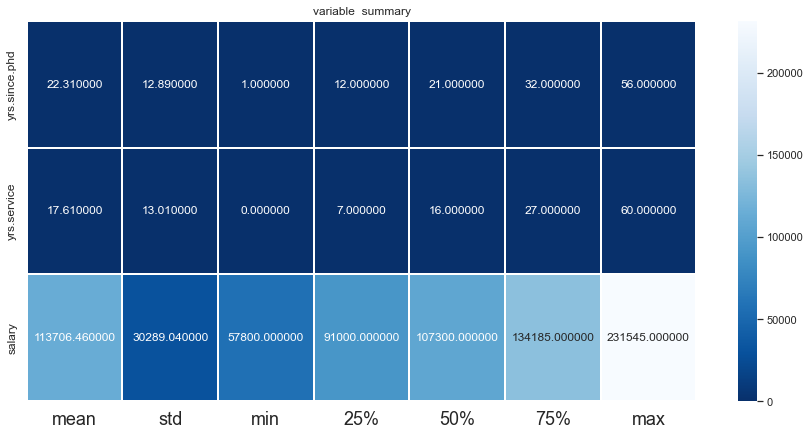

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(round(sal.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True,cmap='Blues_r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable  summary')
plt.show()

observations:
    
    yrs.since.phd:
        mean=22.314681
        std= 12.887
        min= 1.0000
        max = 56.000
        
    yrs.service:
        mean=17.6146
        std=13.006024
        min=0.000
        max= 60.000
        
    salary:
        mean=113706.4584
        std= 30289.038
        min=57800.000
        max =231545.0000
        

In [15]:
# checking  the info   of  the Datatypes  of  all  the columns
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


#### Outliers Checking

<AxesSubplot:xlabel='yrs.since.phd'>

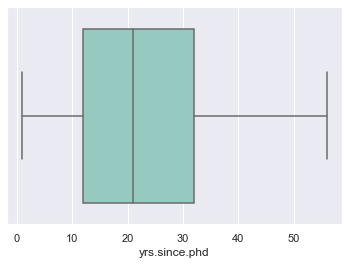

In [16]:
sns.boxplot(sal['yrs.since.phd'], palette='Set3')

so  we  cannot see any  outliers  here 

<AxesSubplot:xlabel='yrs.service'>

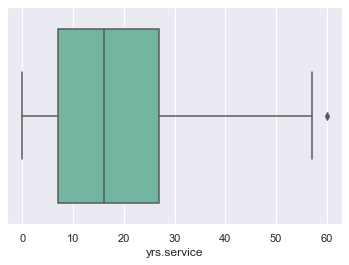

In [17]:
sns.boxplot(sal['yrs.service'], palette='Set2')

so we  can see very  few  outliers  here 

#### Checking   the Skewness in  the Dataset

In [18]:
sal.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

#### Graph  reprresentation of  the columns

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

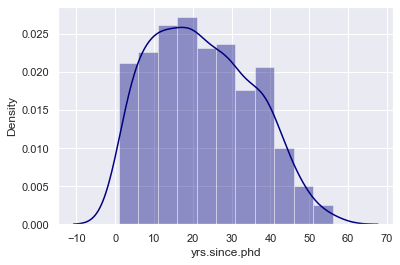

In [19]:
sns.distplot(sal['yrs.since.phd'], color ='navy')

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

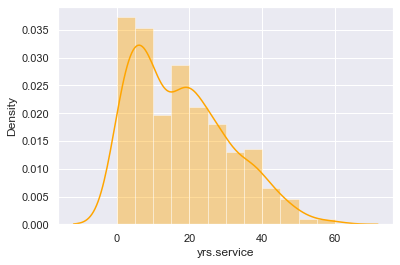

In [20]:
sns.distplot(sal['yrs.service'], color='orange')

observations - As the  skewness is  normal  here  and  yrs.since phd  has  no skewness only  little  skewness
                  is  there in  col yrs.service 

### Data Cleaning  and  preprocessing 

#### Feature engineering (encoding)

labelEncoding   the categorical columns 

In [284]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
sal['rank']=le.fit_transform(sal['rank'])
sal['discipline']=le.fit_transform(sal['discipline'])
sal['sex']=le.fit_transform(sal['sex'])


In [285]:
sal.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
9,2,1,18,18,0,129000


so we  have encoded all  the  categorical  cols  with  the  help  of LabelEncoder 

In [290]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [356]:
def  calcvif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [357]:

calcvif(x) 

AttributeError: 'numpy.ndarray' object has no attribute 'column'

In [ ]:
sal.drop(['yrs.since.phd'],axis=1, inplace=True)

In [323]:
sal.drop(['rank'], axis=1, inplace =True)

In [400]:
sal.drop(['discipline'], axis=1, inplace=True)

In [398]:
sal.drop(['sex'], axis=1, inplace=True)

so as  we  can see  here  that  the  col yrs.since.phd  has  high correlation and  collinearity  which may  effect  the
model  building   thus  we  have   to drop  this  now

#### Outliers removal  with Scipy 

In [401]:
import scipy
from scipy.stats import zscore

z= np.abs(zscore(sal))
z

,yrs.service,salary
0,0.029669,0.860919
1,0.124300,1.966672
2,1.125098,1.122495
3,1.646343,0.042760
4,1.800312,0.918768
...,...,...
392,0.953483,0.350418
393,0.106654,1.218396
394,0.568560,0.395640
395,0.201284,0.607502


In [402]:
#setting  the threshold   limit  as  3  accordance  to  the  emprical  rule  
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))


In [403]:
len(np.where(z>3)[0])

4

In [404]:
z.iloc[364]

yrs.service    1.954281
salary         3.034410
Name: 364, dtype: float64

 So we can  see  that when we are   earching   with  index   when can  see  that  here  in the  row  364  there  is one   
    `outliers  prsent   which  may  easily  effect  our  model  performance 

In [405]:
# now  we  can  drop the  Outliers  from  the  rows 
df_new= sal[(z<3).all(axis=1)]
print('old_dataframe',sal.shape)
print('new_dataframe', df_new.shape)
print('total_dropped_rows', sal.shape[0]-df_new.shape[0])

old_dataframe (397, 2)
new_dataframe (393, 2)
total_dropped_rows 4


So now we have  dropped  all  the  outliers  from the  dataset

In [406]:
loss_percentage = (397-354)/397*100
print('loss_% from the  data:-',loss_percentage,'%')

loss_% from the  data:- 10.831234256926953 %


##### further  split   of  data for processing 

In [409]:
x=df_new.drop(['salary'],axis=1)
y = df_new.iloc[:,1]

In [410]:
y.shape

(393,)

In [411]:
x.shape

(393, 1)

#### Transformation to remove all skewness

In [412]:
df_new.skew()

yrs.service    0.588861
salary         0.581098
dtype: float64

In [413]:
from sklearn.preprocessing  import power_transform
x=power_transform(df_new,method='yeo-johnson')
x

array([[ 0.26888583,  0.        ],
       [ 0.1209006 ,  0.        ],
       [-1.28449532,  0.        ],
       [ 1.46109915,  0.        ],
       [ 1.55315864,  0.        ],
       [-0.84005312,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.72997607,  0.        ],
       [ 0.40814245,  0.        ],
       [ 0.26888583,  0.        ],
       [-0.60348074,  0.        ],
       [-1.47508922,  0.        ],
       [-1.70716059,  0.        ],
       [-2.02223253,  0.        ],
       [ 0.26888583,  0.        ],
       [-1.28449532,  0.        ],
       [ 0.40814245,  0.        ],
       [ 1.21866709,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.31789249,  0.        ],
       [ 0.78500622,  0.        ],
       [ 1.06349813,  0.        ],
       [ 1.00992197,  0.        ],
       [ 0.33951754,  0.        ],
       [-0.60348074,  0.        ],
       [-0.60348074,  0.        ],
       [ 0.60337981,  0.        ],
       [-1.28449532,  0.        ],
       [-2.02223253,

 as we  can see  that  the  rank  after tranformation  also  giving  us   high  skeness  with negativity and  its 
    contribution is  also less   to  the  output  so  we  are   dropping  the 

Plotting  the Normal  distribution plots

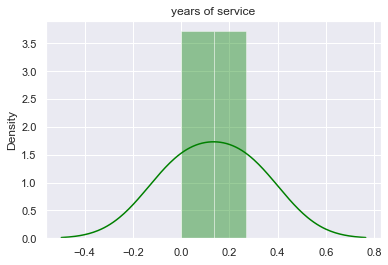

In [414]:
sns.distplot(x[0], color='green')
plt.title("years of service")
plt.show()

so  we   can see  that  all  the  colummn which  has  little  of skewness present  is now changed   to 
normal  distribution plot

##### Feature Scaling using Standard Scaler

In [415]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x

array([[ 0.26888583,  0.        ],
       [ 0.1209006 ,  0.        ],
       [-1.28449532,  0.        ],
       [ 1.46109915,  0.        ],
       [ 1.55315864,  0.        ],
       [-0.84005312,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.72997607,  0.        ],
       [ 0.40814245,  0.        ],
       [ 0.26888583,  0.        ],
       [-0.60348074,  0.        ],
       [-1.47508922,  0.        ],
       [-1.70716059,  0.        ],
       [-2.02223253,  0.        ],
       [ 0.26888583,  0.        ],
       [-1.28449532,  0.        ],
       [ 0.40814245,  0.        ],
       [ 1.21866709,  0.        ],
       [ 0.60337981,  0.        ],
       [ 1.31789249,  0.        ],
       [ 0.78500622,  0.        ],
       [ 1.06349813,  0.        ],
       [ 1.00992197,  0.        ],
       [ 0.33951754,  0.        ],
       [-0.60348074,  0.        ],
       [-0.60348074,  0.        ],
       [ 0.60337981,  0.        ],
       [-1.28449532,  0.        ],
       [-2.02223253,

In [376]:
x.shape

(354, 2)

In [377]:
y.shape

(354,)

So  now  we  have performed   the  standard  scaling in all  of  our  features for  making a best   model  from the 
data

standarization means

mean : 0

std.dev=1

#### Creating  the Model  for predictions

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

##### Splitting   the  DataFrame into train_test_split

##### Testing   diffrent algorithms

LINEAR REGRESSION

In [417]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=250, test_size=0.20)
lr= LinearRegression( positive=True, n_jobs=2)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Result  from Linear regression model')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))
    

Result  from Linear regression model
R2 score is  -3.8150037189915444
mean_squared_error 669005496.0986025


In [418]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso_reg =linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [419]:
lasso_reg.score(x_test,y_test)

0.08146081551106166

RANDOM  FOREST

In [457]:
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('result  from random_forestregressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))
    

result  from random_forestregressor
R2 score is  -1.0843614524095413
mean_squared_error 650559933.6543702


SVM  REGRESSOR

In [475]:
from sklearn.svm import SVR
sv = SVR(kernel ='rbf', gamma=1, epsilon=3)
sv.fit(x_train, y_train)
pred_sv= sv.predict(x_test)
print('result  from svm regrssor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))
    

result  from svm regrssor
R2 score is  -1.0843614524095413
mean_squared_error 650559933.6543702


KNN REGRESSOR

In [477]:
from sklearn.neighbors  import KNeighborsRegressor
kn =KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
kn.fit(x_train, y_train)
pred_kn= kn.predict(x_test)
print('result  from knn regressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))
    

result  from knn regressor
R2 score is  -1.0843614524095413
mean_squared_error 650559933.6543702


#### using  of  Cross _validation

In [429]:
from sklearn.model_selection import  KFold
#KFold(n-split=5)

Kfold= KFold(9)
cv_mod= cross_val_score(lr,x,y,cv=Kfold)
print(score)
print(score.mean())
print(score.std())


[0.21401246 0.04182082]
0.12791664084316212
0.08609581720137094


In [478]:
import pickle
filename='salary _predictions'
pickle.dump(kn,open(filename,'wb'))

In [479]:
import numpy as np
a =np.array(y_test)
predicted=np.array(kn.predict(x_test))
df_sal=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df_sal

,Orginal,Predicted
0,134690,118953.200000
1,77000,83113.571429
2,93000,105936.000000
3,83000,98160.285714
4,78162,134380.000000
...,...,...
74,94350,132178.714286
75,70700,111783.333333
76,111350,118953.200000
77,70768,84595.571429
